<a href="https://colab.research.google.com/github/ArushKhare/Document-Reader/blob/main/IntroToPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
tensor = torch.tensor
t = torch.tensor([1, 2, 3, 4, 5])
t2 = torch.tensor([6, 7, 8, 9, 10])
t
t2

tensor([ 6,  7,  8,  9, 10])

In [ ]:
#t = t + t2
t.add_(t2)

tensor([ 7,  9, 11, 13, 15])

In [ ]:
# Creates a model class that inherits the nn.Module used for neural networks

class Model(nn.Module):
  # Input Layer (4 features of the flower) -->  Hidden Layer1(number of neurons)
  # --> H2 (n) --> Output Layer(3 species of flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of our Model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# Change last column from string to float
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-8-210853034.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train test split Set X, Y and convert to numpy arrays using values
X = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Training the test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert Y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set criterion of model to measure the error, how far the predictions are off from the true value
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer(it's good for certain gradients)
# lr = learning rate(if error doesn't go down after some epochs might want to lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
# Train the model
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
epochs = 100
losses = []
#Go forward and make a prediction
for i in range(epochs):
  y_pred = model.forward(X_train) # get the predicted results
  # Measure the prediction against the true value(Should be relatively high at first)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy()) # keep track of losses as a tensor

  if i%10 == 0: # Print every 10 epochs
    print(f'Epoch: {i} Loss: {loss}')
  # Do some backpropagation by taking the error rates of thr forward propagation
  #and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1258565187454224
Epoch: 10 Loss: 1.0208169221878052
Epoch: 20 Loss: 0.8364942669868469
Epoch: 30 Loss: 0.5963050723075867
Epoch: 40 Loss: 0.4034278094768524
Epoch: 50 Loss: 0.2753926217556
Epoch: 60 Loss: 0.18981888890266418
Epoch: 70 Loss: 0.13495659828186035
Epoch: 80 Loss: 0.10140735656023026
Epoch: 90 Loss: 0.08237125724554062


Text(0.5, 0, 'Epoch')

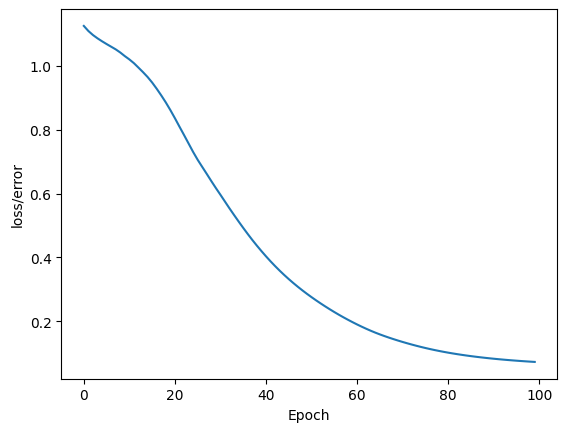

In [ ]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # Turns off back-propagation when testing
  #X_test are the features from our test set and y_eval are the predictions
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test) # Find the loss or error

In [ ]:
loss

tensor(0.0814)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #Tell us the type of flower our network thinks it is
    print(f'{i + 1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_test[i] == 0:
      x = 'setosa'
    elif y_test[i] == 1:
      x = 'versicolor'
    else:
      x = 'virginica'


    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} correct')

1.) tensor([-3.3818,  5.3003,  1.2471]) 	 1 	 1
2.) tensor([-3.7489,  5.7193,  1.3276]) 	 1 	 1
3.) tensor([ 4.2423, -1.7600, -2.6495]) 	 0 	 0
4.) tensor([-4.4885,  5.5717,  2.7496]) 	 1 	 1
5.) tensor([-5.9619,  4.2907,  6.6696]) 	 2 	 2
6.) tensor([-8.3947,  3.7158, 11.3060]) 	 2 	 2
7.) tensor([ 4.0314, -1.5607, -2.5629]) 	 0 	 0
8.) tensor([ 4.7273, -2.1881, -2.8748]) 	 0 	 0
9.) tensor([-6.2237,  4.6599,  6.6679]) 	 2 	 2
10.) tensor([-7.5497,  4.6657,  8.8206]) 	 2 	 2
11.) tensor([-7.8520,  4.3975,  9.6315]) 	 2 	 2
12.) tensor([ 4.3904, -1.9098, -2.7020]) 	 0 	 0
13.) tensor([-7.4703,  4.1877,  9.2425]) 	 2 	 2
14.) tensor([-4.3290,  5.2224,  2.9023]) 	 1 	 1
15.) tensor([-6.7610,  5.1107,  6.9945]) 	 2 	 2
16.) tensor([-3.5632,  5.5349,  1.2329]) 	 1 	 1
17.) tensor([-5.3114,  4.7874,  5.0033]) 	 2 	 2
18.) tensor([ 4.8313, -2.2840, -2.9196]) 	 0 	 0
19.) tensor([-4.3809,  5.5033,  2.6670]) 	 1 	 1
20.) tensor([-6.8154,  5.1017,  7.1436]) 	 2 	 2
21.) tensor([ 4.5650, -2.0532

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])


In [ ]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([ 4.6512, -2.1351, -2.8274])
0


In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [ ]:
with torch.no_grad():
  print(model.forward(newer_iris))
  print(model.forward(newer_iris).argmax().item())


tensor([-5.7619,  4.4352,  6.1566])
2


In [ ]:
# Save and load our Neural Network model
torch.save(model.state_dict(), 'iris_model.pt') # Saves the model in my google colab account

In [ ]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)